# I2AI Experience

## Fundamentos de Inteligência Artificial

## By Alexandre Dietrich

#### Sentiment Analysis with Deep Learning

#### Dataset: IMDB

#### Date: 16/11/20

## Tools
### Python, Numpy, Matplotlib, Keras and TensorFlow

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.datasets import imdb
from tensorflow import keras
from tensorflow.keras import layers

# 2 - Data Phase

## Collect Data

In [2]:
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(X_train_data, Y_train_labels), (X_test_data, Y_test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [3]:
X_train_data.shape, X_test_data.shape

((25000,), (25000,))

## Explore and Analyze Data

In [4]:
print(X_train_data.dtype)

object


In [5]:
X_train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
Y_train_labels[0]

1

In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

In [8]:
row = 10

review = X_train_data[row]
sentiment = Y_train_labels[row]

decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in review])

In [9]:
print('Sentiment: ', (lambda x: 'Positive' if x == 1 else 'Negative' )(sentiment))
print('')
print(decoded_review)

Sentiment:  Positive

? french horror cinema has seen something of a revival over the last couple of years with great films such as inside and ? romance ? on to the scene ? ? the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made ? was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is ? by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named ? sent to prison for fraud he is put in a cell with three others the quietly insane ? body building ? marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old ? after ? part of it they soon realise its magical powers and realise they may be able to use it to break through the prison 

## Clean and Transform Data

<div align="left">
<img src="images/IMDB data transformation.png" alt="Drawing" style="width: 600px;"/>
</div>

In [10]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(X_train_data)
x_test = vectorize_sequences(X_test_data)

x_train.shape, x_test.shape

((25000, 10000), (25000, 10000))

In [11]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
y_train = np.asarray(Y_train_labels).astype('float32')
y_test = np.asarray(Y_test_labels).astype('float32')

### Prepare Training and Validation Data

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# 3 - Modelling/Training Phase

## Define Neural Network Model Architecture

<div align="left">
<img src="images/NN Architecture.png" alt="Drawing" style="width: 600px;"/>
</div>

In [14]:
model = keras.Sequential([
            layers.Dense(16, activation='relu'),
            layers.Dense(16, activation='relu'),
            layers.Dense(1, activation='sigmoid')
])

## Define Hyperparameters

<div align="left">
<img src="images/Compile.png" alt="Drawing" style="width: 600px;"/>
</div>

In [15]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


## Train Neural Network Model

<div align="left">
<img src="images/Training loop.png" alt="Drawing" style="width: 600px;"/>
</div>

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
15000/15000 [==============================] - 3s 209us/sample - loss: 0.5556 - acc: 0.7685 - val_loss: 0.4323 - val_acc: 0.8676
Epoch 2/10
15000/15000 [==============================] - 2s 119us/sample - loss: 0.3495 - acc: 0.8958 - val_loss: 0.3313 - val_acc: 0.8811
Epoch 3/10
15000/15000 [==============================] - 2s 107us/sample - loss: 0.2498 - acc: 0.9219 - val_loss: 0.2858 - val_acc: 0.8918
Epoch 4/10
15000/15000 [==============================] - 2s 109us/sample - loss: 0.1947 - acc: 0.9363 - val_loss: 0.2784 - val_acc: 0.8885
Epoch 5/10
15000/15000 [==============================] - 2s 105us/sample - loss: 0.1553 - acc: 0.9513 - val_loss: 0.3126 - val_acc: 0.8762
Epoch 6/10
15000/15000 [==============================] - 2s 104us/sample - loss: 0.1284 - acc: 0.9613 - val_loss: 0.2854 - val_acc: 0.8871
Epoch 7/10
15000/15000 [==============================] - 2s 1

<div align="left">
<img src="images/After training.png" alt="Drawing" style="width: 600px;"/>
</div>

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  160016    
_________________________________________________________________
dense_1 (Dense)              multiple                  272       
_________________________________________________________________
dense_2 (Dense)              multiple                  17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


## Evaluate Model

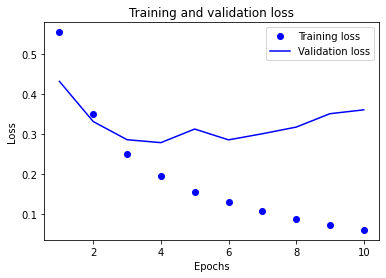

In [18]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

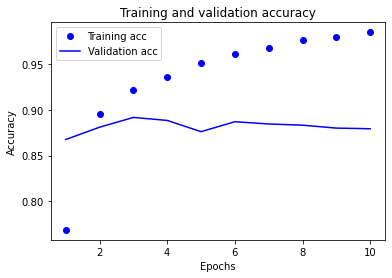

In [19]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Test Trained Model Before Production Deployment

<div align="left">
<img src="images/IMDB Trained model.png" alt="Drawing" style="width: 600px;"/>
</div>

In [20]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 98us/sample - loss: 0.3955 - acc: 0.8667


In [21]:
predictions = model.predict(x_test)
predictions[0:15]

array([[6.4861715e-02],
       [9.9999607e-01],
       [9.3594003e-01],
       [9.2381799e-01],
       [9.5711666e-01],
       [9.8067129e-01],
       [9.9111462e-01],
       [5.8106184e-03],
       [9.6052802e-01],
       [9.9988794e-01],
       [9.4374573e-01],
       [2.2515357e-03],
       [7.8439713e-05],
       [1.4141500e-03],
       [9.9999720e-01]], dtype=float32)

In [22]:
predictions[0:15], Y_test_labels[0:15]

(array([[6.4861715e-02],
        [9.9999607e-01],
        [9.3594003e-01],
        [9.2381799e-01],
        [9.5711666e-01],
        [9.8067129e-01],
        [9.9111462e-01],
        [5.8106184e-03],
        [9.6052802e-01],
        [9.9988794e-01],
        [9.4374573e-01],
        [2.2515357e-03],
        [7.8439713e-05],
        [1.4141500e-03],
        [9.9999720e-01]], dtype=float32),
 array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1]))

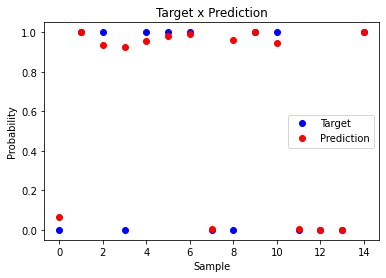

In [29]:
plt.clf()
plt.plot(range(15), Y_test_labels[0:15], 'bo', color='blue', label='Target')
plt.plot(range(15), predictions[0:15], 'bo', color='red', label='Prediction')
plt.title('Target x Prediction')
plt.xlabel('Sample')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [27]:
row = 6

review = X_test_data[row]
sentiment = predictions[row]

decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in review])

In [28]:
print('Sentiment: prediction = ', (lambda x: 'Positive' if x > 0.5 else 'Negative' )(sentiment))
print('           target     = ', (lambda x: 'Positive' if x == 1 else 'Negative' )(Y_test_labels[row]))
print('')
print(decoded_review)

Sentiment: prediction =  Positive
           target     =  Positive

? originally supposed to be just a part of a huge epic the year ? depicting the revolution of ? ? is the story of the ? of the crew of the ? in ? harbor the film opens with the crew ? meat and the captain ? the execution of the an ? takes place during which the revolutionary leader is killed this ? is taken to the shore to lie in state when the ? gather on a huge flight of steps ? the harbor ? troops appear and march down the steps breaking up the crowd a naval ? is sent to ? the ? but at the moment when the ships come into range their ? allow the to pass through ? non historically accurate ending is open ended thus ? that this was the seed of the later ? revolution that would bloom in russia the film is broken into five parts men and ? drama on the an appeal from the dead the ? steps and meeting the ? br br ? was a revolutionary artist but at the genius level not wanting to make a historical drama ? used visual ? to 